# Classification in Python

**Classification** is a type of supervised learning method where you are trying to determine what category an observation falls under based on a training dataset with known classifications. 

A simple example of classification is determining whether an email is spam. Another more complex example is having an image classifier tell the difference between apples, oranges, and peaches.  

Classification Terminology:
* Each data point is called an **observation** also known as an **instance**
* The prediction variables (x<sub>1</sub>, x<sub>2</sub>,...,x<sub>n</sub>) are called **features**
* Each possible category is called a **class**

In classification, the hardest part is determining the boundaries between the different classes.
### Where do we draw the line between an apple / orange? Should we even draw a line? 
<img src="fruit_pic.png" alt="Drawing" style="width: 400px;"/>

And this is just two dimensions! Imagine 5, 10, 50 or more features! At more than 4 features it becomes difficult to graph out and determine the boundary. Further, not all data will be able to be easily placed into the different classes. And of course, we can have more than 2 classes as we see here. 


## K-Nearest Neighbors
[Source](https://kevinzakka.github.io/2016/07/13/k-nearest-neighbor/)
[Source 2](http://machinelearningmastery.com/tutorial-to-implement-k-nearest-neighbors-in-python-from-scratch/) 

** K-Nearest Neighbors (KNN)**, in the most basic and literal sense, is looking at an instance's features and comparing it with "k" instances closest to it. Based on where the instance is "mapped" relative to others and how many neighbors you look at, you can determine its class. KNN is actually special in that we can use it for both classification and regression, but we'll emphasize its use in classification. 

Here's classify apples and fruits using 3-Nearest Neighbors: 
<img src="knn_fruit_pic.png" alt="Drawing" style="width: 400px;"/>

All three nearest neighbors of the red question mark are apples, so the red question mark will be classified as an apple. For the blue question mark, it looks like a toss-up between orange or apple. If we use 3-Nearest Neighbors for the blue question mark, then the blue question mark will be classified as an orange since there are more oranges in the circle than apples. 

KNN is a **competitive learning algorithm** because the class of an instance is determined by a "competition" between other instances surrounding it. Additionally, KNN is a **lazy learning algorithm** because the model is not built until we need to predict something. 

### What would we do if we had 4-Nearest neighbors and we had a tie? What would be the best way of classifying an instance then?

To avoid ties in general, it's best to keep k as an odd number for problems with two classes, as well as prevent k from being a multiple of the number of classes. 

To calculate the nearest neighbor, we can use the handy-dandy distance formula from middle-school! 

Remember this? 
<img src="distance.png" alt="Drawing" style="width: 400px;"/>

Same formula to calculate distance! Except this works only for two features. We have to generalize this for multiple features. This distance is called the **Euclidean Distance.**

<img src="generalized_distance.png" alt="Drawing" style="width: 400px;"/>

Here we calculate the Euclidean distance between two instances: j and k. 

Let's move on to coding this! We'll use KNN to classify the famous Iris dataset. 

*Left to right: Iris setosa, Iris virginica, Iris versicolor*

<img src="iris_setosa.jpg" alt="Drawing" style="width: 200px;display: inline;"/>
<img src="Iris_virginica.jpg" alt="Drawing" style="width: 200px;display: inline;"/>
<img src="Iris_versicolor.jpg" alt="Drawing" style="width: 200px;display: inline;"/>


[Code Source](http://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html#sphx-glr-auto-examples-neighbors-plot-classification-py) 
[Code Source 2](https://turi.com/learn/userguide/supervised-learning/knn_classifier.html)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

iris = datasets.load_iris()
print("Features are: " + str(iris.feature_names) + "\n")
print("Classes are: " + str(iris.target_names) + ", which correspond to these classes: " + str(set(iris.target)))
print(iris.data)


Features are: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

Classes are: ['setosa' 'versicolor' 'virginica'], which correspond to these classes: {0, 1, 2}
[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]
 [ 4.6  3.1  1.5  0.2]
 [ 5.   3.6  1.4  0.2]
 [ 5.4  3.9  1.7  0.4]
 [ 4.6  3.4  1.4  0.3]
 [ 5.   3.4  1.5  0.2]
 [ 4.4  2.9  1.4  0.2]
 [ 4.9  3.1  1.5  0.1]
 [ 5.4  3.7  1.5  0.2]
 [ 4.8  3.4  1.6  0.2]
 [ 4.8  3.   1.4  0.1]
 [ 4.3  3.   1.1  0.1]
 [ 5.8  4.   1.2  0.2]
 [ 5.7  4.4  1.5  0.4]
 [ 5.4  3.9  1.3  0.4]
 [ 5.1  3.5  1.4  0.3]
 [ 5.7  3.8  1.7  0.3]
 [ 5.1  3.8  1.5  0.3]
 [ 5.4  3.4  1.7  0.2]
 [ 5.1  3.7  1.5  0.4]
 [ 4.6  3.6  1.   0.2]
 [ 5.1  3.3  1.7  0.5]
 [ 4.8  3.4  1.9  0.2]
 [ 5.   3.   1.6  0.2]
 [ 5.   3.4  1.6  0.4]
 [ 5.2  3.5  1.5  0.2]
 [ 5.2  3.4  1.4  0.2]
 [ 4.7  3.2  1.6  0.2]
 [ 4.8  3.1  1.6  0.2]
 [ 5.4  3.4  1.5  0.4]
 [ 5.2  4.1  1.5  0.1]
 [ 5.5  4.2  1.4  0.2]
 [ 4.9  3.1  1.5  0.1]
 [

For graphical purposes, we are going to try predict the iris species using only two features: sepal length and sepal width. 

In [3]:
from sklearn.model_selection import train_test_split

X = iris.data[:, :2]  
y = iris.target
print(X.shape)
print(y.shape)

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(150, 2)
(150,)
(120, 2)
(120,)
(30, 2)
(30,)


In [4]:
h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])


Accuracy score for uniform is: 0.833333333333
Accuracy score for distance is: 0.833333333333


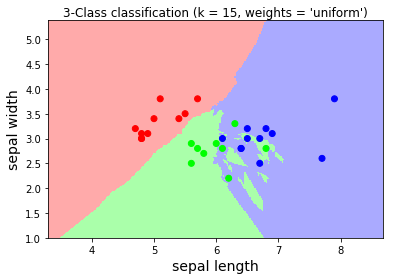

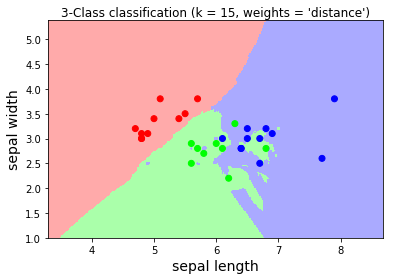

<function __main__.nearest_neighbors>

In [5]:
from ipywidgets import interact, widgets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# Run the following code in your terminal to make the code interactive
#jupyter nbextension enable --py --sys-prefix widgetsnbextension

def nearest_neighbors(k):
    n_neighbors = k
    for weights in ['uniform', 'distance']:
        # we create an instance of Neighbours Classifier and fit the data.
        clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
        
        clf.fit(X_train, y_train)
        pred = clf.predict(X_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
        y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                             np.arange(y_min, y_max, h))
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        plt.figure()
        plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

        # Plot all points
        
        plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap_bold)
        plt.xlim(xx.min(), xx.max())
        plt.ylim(yy.min(), yy.max())
        plt.title("3-Class classification (k = %i, weights = '%s')"
                  % (n_neighbors, weights))
        plt.xlabel('sepal length', fontsize=14)
        plt.ylabel('sepal width', fontsize=14)
        print("Accuracy score for " + weights + " is: " + str(accuracy_score(y_test, pred)))

    plt.show()
    

interact(nearest_neighbors, k=widgets.IntSlider(min=1,max=50,step=1,value=15))




### Explore
What patterns do you see as you change the k value in k-nearest neighbors? How does accuracy change both for the different types of weights? Try changing the scatter plot to training data and then training+testing data. What do you notice?
___

Overall, K-NN is simple to understand, easy to implement and effective in classifying multi-class data. The main advantage is that training time is extremely fast, but one disadvantage is that the testing time can be slow in data-sets with a large number of instances and thus computationally expensive. 

Ordinary KNN can be skewed by uneven class distributions (e.g. the number of instances in one class greatly outnumbers the number of instances in another class). We can fix this by using weighted voting, which allows closer neighbors to have a greater impact on the vote than neighbors further away. 

Lastly, be careful with adding too many features to your KNN because not only will computation time increase, but also there will be little difference between near and far neighbors. The **curse of dimensionality** also states that with more dimensions, the dimensional space becomes more expansive and data becomes sparse in that increased space. You will need to have more data with more dimensions. 

## Logistic Regression

[Source](https://onlinecourses.science.psu.edu/stat504/node/150)
[Source2](https://www.youtube.com/watch?v=zAULhNrnuL4)

**Logistic regression** is a type of regression analysis where the dependent variable is categorical. We will first focus on **binary logistic regression** which has two classes: 1 and 0. We can represent these two classes based on the context: pass/fail, yes/no, approve/reject, etc. 

Since binary logistic regression has a categorical output, there is no middle ground in a binary classification of instances in training data. For example, if we want to build a logistic regression model that identifies based off brain-related explanatory data whether a patient has Alzheimer's disease, the outcomes in the training data must be either HAS Alzheimer's or DOES NOT HAVE Alzheimer's. There is no "might have" Alzheimer's or 78% chance of having Alzheimer's in the training data. The choices are mutually exclusive. 

### How would you convert a continuous dataset to a categorical dataset to run a binary logistic regression? 


When we run a logistic regression, we won't necessarily get a binary response; we will instead get a *probability* of an event occuring based on the inputs we provide. We can then predict and classify new instances based off the probability we get from inputting a series of independent variables.

Let's see an example. 

Dataset: https://archive.ics.uci.edu/ml/datasets/wine+quality

We are specifically going to look at what chemical features in red wine make the wine quality good. The quality of red wine in this dataset is ranked from 1-10, so we are going to arbitrarily set that anything greater than or equal to 7 is considered good. 6 or below is bad. Using logistic regression, we are going to predict which wines taste "good" or "bad" depending on its chemical features.


In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split

data = pd.read_csv("winequality-red.csv", sep=';')

# Good quality wines are coded as 1
# Poor quality wines are coded as 0
data["quality"] = (data["quality"]>=7).astype(int)
print(data.head())

X = data.iloc[:,:11]
y = data.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        0  
1      9.8        0  
2      9.8        0 

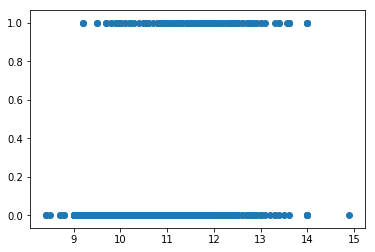

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(data["alcohol"],y)
plt.show()

We can't do a normal linear regression and plot a line of best fit because the output is either 1 or 0, not a continous linear output. We have to figure out a way how to take a series of continuous inputs and get out a 1 or a 0. 

To understand how to do this, we will need to understand a concept called **odds**.
We know what probability is. It's the chance of an event occurring over all possible outcomes. 
Odds are defined as the ratio between an event occurring and the event not occurring. 

Odds = p / 1-p, where p is the probability of an event occurring

The probability of a rolling a 1 on a die is **1/6**. 

Odds in favor of rolling a 1 = 1/6 / (5/6) = ** 1:5 **

Odds against for rolling a 1 are **5:1 **

**Note that odds are NOT the same as probability. Always keep this in mind when working with odds!**

The range of odds is from 0 to infinity, while the range of probability is from 0 to 1. Shortly, we will see why thhis important to understand for the logistic regression. 

The last thing we should know is the **odds ratio**. It literally is a ratio between two odds. 

odds ratio = [a/(1-a)] / [b/(1-b)]

## Decision Trees

## Random Forest